In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Housing price predictor/train.csv")

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

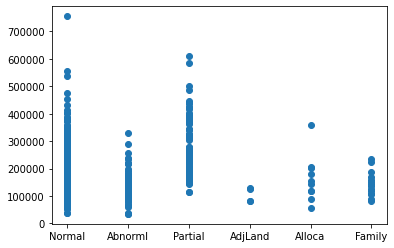

In [9]:
fig, ax = plt.subplots()
ax.scatter(df["SaleCondition"][:1000], df["SalePrice"][:1000]);

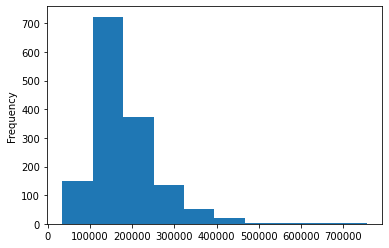

In [10]:
df.SalePrice.plot.hist();

In [11]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [0]:
#Let's save a copy of the original dataset
df_temp = df.copy()

In [14]:
#checking missing values
df_temp.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [16]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
#Let's cobnvert all string values into categorical values
for label, content in df_temp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)
    df_temp[label] = content.astype("category").cat.as_ordered()

#converted object to categories

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [18]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

In [0]:
#Let's save preprocessed data
df_temp.to_csv("/content/drive/My Drive/Colab Notebooks/Housing price predictor/train_temp.csv", index=False)

In [20]:
df_temp = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Housing price predictor/train_temp.csv",
                     low_memory=False)
df_temp.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [21]:
df_temp.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

It still has missing values

**Defining a function that can be used to preprocess both training data and test data.**

Preprocessing means 
* No null values, so filling categorical values with some kind of numbers, here median

* Turning categorical values converted above into numbers

In [0]:
def preprocess_data(df):
  """
  Used to process train/test data after necessary analysis
  """
  #Filling numerical rows with median
  for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
      if pd.isnull(content).sum():
        df[label+"_is_missing"] = pd.isnull(content)
        df[label] = content.fillna(content.median())

    #turning categories into numbers
    if not pd.api.types.is_numeric_dtype(content):
      df[label+"_is_missing"] = pd.isnull(content)
      df[label] = pd.Categorical(content).codes+1

  return df

In [0]:
df_temp = preprocess_data(df_temp)

In [24]:
df_temp.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,4,4,4,4,4
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,2,2,2,2,2
Alley,0,0,0,0,0
LotShape,4,4,1,1,1
LandContour,4,4,4,4,4
Utilities,1,1,1,1,1


In [25]:
df_temp.isna().sum()

Id                          0
MSSubClass                  0
MSZoning                    0
LotFrontage                 0
LotArea                     0
Street                      0
Alley                       0
LotShape                    0
LandContour                 0
Utilities                   0
LotConfig                   0
LandSlope                   0
Neighborhood                0
Condition1                  0
Condition2                  0
BldgType                    0
HouseStyle                  0
OverallQual                 0
OverallCond                 0
YearBuilt                   0
YearRemodAdd                0
RoofStyle                   0
RoofMatl                    0
Exterior1st                 0
Exterior2nd                 0
MasVnrType                  0
MasVnrArea                  0
ExterQual                   0
ExterCond                   0
Foundation                  0
BsmtQual                    0
BsmtCond                    0
BsmtExposure                0
BsmtFinTyp

No missing values, success!

Let's instiate machine learning model

In [26]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1)
model.fit(df_temp.drop("SalePrice", axis=1), df_temp.SalePrice)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [27]:
model.score(df_temp.drop("SalePrice", axis=1), df_temp.SalePrice)

0.9804249880146917

**Split the data into train and valid data**

In [28]:
df_temp.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,4,4,4,4,4
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,2,2,2,2,2
Alley,0,0,0,0,0
LotShape,4,4,1,1,1
LandContour,4,4,4,4,4
Utilities,1,1,1,1,1


In [0]:
X = df_temp.drop("SalePrice", axis=1)
y = df_temp.SalePrice.values

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score
np.random.seed(42)
X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                      y,
                                                      test_size=0.2)

In [31]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSZoning_is_missing,LotFrontage_is_missing,Street_is_missing,Alley_is_missing,LotShape_is_missing,LandContour_is_missing,Utilities_is_missing,LotConfig_is_missing,LandSlope_is_missing,Neighborhood_is_missing,Condition1_is_missing,Condition2_is_missing,BldgType_is_missing,HouseStyle_is_missing,RoofStyle_is_missing,RoofMatl_is_missing,Exterior1st_is_missing,Exterior2nd_is_missing,MasVnrType_is_missing,MasVnrArea_is_missing,ExterQual_is_missing,ExterCond_is_missing,Foundation_is_missing,BsmtQual_is_missing,BsmtCond_is_missing,BsmtExposure_is_missing,BsmtFinType1_is_missing,BsmtFinType2_is_missing,Heating_is_missing,HeatingQC_is_missing,CentralAir_is_missing,Electrical_is_missing,KitchenQual_is_missing,Functional_is_missing,FireplaceQu_is_missing,GarageType_is_missing,GarageYrBlt_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
254,255,20,4,70.0,8400,2,0,4,4,1,5,1,13,3,3,1,3,5,6,1957,1957,2,2,9,9,3,0.0,4,3,2,4,4,4,5,922,6,0,392,1314,2,5,2,5,1314,0,0,1314,1,0,1,0,3,1,4,5,7,0,0,2,1957.0,2,1,294,5,5,3,250,0,0,0,0,0,0,0,0,0,6,2010,9,5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,False,False
1066,1067,60,4,59.0,7837,2,0,1,4,1,5,1,9,3,3,1,6,6,7,1993,1994,2,2,13,14,3,0.0,3,5,3,3,4,4,6,0,6,0,799,799,2,3,2,5,799,772,0,1571,0,0,2,1,3,1,4,7,7,1,5,2,1993.0,2,2,380,5,5,3,0,40,0,0,0,0,0,0,0,0,5,2009,9,5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False
638,639,30,4,67.0,8777,2,0,4,4,1,5,1,8,2,3,1,3,5,7,1910,1950,2,2,9,15,3,0.0,4,5,2,2,4,4,6,0,6,0,796,796,2,3,2,1,796,0,0,796,0,0,1,0,2,1,4,4,7,0,0,0,1980.0,0,0,0,0,0,2,328,0,164,0,0,0,0,3,0,0,5,2008,9,5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,True,False,True,False,False
799,800,50,4,60.0,7200,2,0,4,4,1,1,1,19,2,3,1,1,5,7,1937,1950,2,2,14,15,2,252.0,4,5,1,3,4,4,1,569,6,0,162,731,2,1,2,5,981,787,0,1768,1,0,1,1,3,1,3,7,7,2,5,6,1939.0,3,1,240,5,5,3,0,0,264,0,0,0,0,3,0,0,6,2007,9,5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
380,381,50,4,50.0,5000,2,2,4,4,1,5,1,19,3,3,1,1,5,6,1924,1950,2,2,4,15,3,0.0,4,5,1,4,4,4,4,218,6,0,808,1026,2,5,2,5,1026,665,0,1691,0,0,2,0,3,1,3,6,7,1,3,6,1924.0,3,1,308,5,5,3,0,0,242,0,0,0,0,0,0,0,5,2010,9,5,False,False,False,False,False,False,False,F

In [32]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1168, 126), (1168,), (292, 126), (292,))

Building evaluation function

In [0]:
#create evaluation fn root mean squared log error
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
def rmsle(y_test, y_preds):
  return np.sqrt(mean_squared_log_error(y_test,y_preds))

#create fn to evaluate model
def show_scores(model):
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_valid)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Validation MAE": mean_absolute_error(y_valid, val_preds),
            "Training RMSLE": rmsle(y_train, train_preds),
            "Valid RMSLE": rmsle(y_valid, val_preds),
            "Training R^2": model.score(X_train, y_train),
            "Valid R^2": model.score(X_valid, y_valid)
            }
  return scores

Testing our model to tune hyperparameters

In [34]:
len(X_train)

1168

In [0]:
# Change max samples in RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              )

In [36]:
%%time
model.fit(X_train, y_train)

CPU times: user 3.27 s, sys: 16.8 ms, total: 3.29 s
Wall time: 1.75 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [37]:
show_scores(model)

{'Training MAE': 6711.146729452055,
 'Training RMSLE': 0.06041722920894186,
 'Training R^2': 0.9778594145543048,
 'Valid RMSLE': 0.15426735448936055,
 'Valid R^2': 0.8859257005253993,
 'Validation MAE': 17967.091301369863}

**Hyperparameter tuning using RandomSearchCV**

In [38]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [500]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.3s finished


CPU times: user 16.6 s, sys: 21.5 ms, total: 16.6 s
Wall time: 16.6 s


In [41]:
rs_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'max_samples': 500,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 40}

In [42]:
show_scores(rs_model)

{'Training MAE': 13531.164608330182,
 'Training RMSLE': 0.11545879842791483,
 'Training R^2': 0.9098120111137835,
 'Valid RMSLE': 0.16024811312843634,
 'Valid R^2': 0.8715958181742778,
 'Validation MAE': 18826.90688305729}

In [43]:
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=30,
                                    min_samples_leaf=1,
                                    min_samples_split=10,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [44]:
show_scores(ideal_model)

{'Training MAE': 9652.873410862096,
 'Training RMSLE': 0.08458117936089245,
 'Training R^2': 0.9521757537918726,
 'Valid RMSLE': 0.15781015674762244,
 'Valid R^2': 0.877964285395633,
 'Validation MAE': 18310.57969612835}

Make predictions on test data

In [45]:
df_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Housing price predictor/test.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [46]:
df_test = preprocess_data(df_test)
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSZoning_is_missing,LotFrontage_is_missing,Street_is_missing,Alley_is_missing,LotShape_is_missing,LandContour_is_missing,Utilities_is_missing,LotConfig_is_missing,LandSlope_is_missing,Neighborhood_is_missing,Condition1_is_missing,Condition2_is_missing,BldgType_is_missing,HouseStyle_is_missing,RoofStyle_is_missing,RoofMatl_is_missing,Exterior1st_is_missing,Exterior2nd_is_missing,MasVnrType_is_missing,MasVnrArea_is_missing,ExterQual_is_missing,ExterCond_is_missing,Foundation_is_missing,BsmtQual_is_missing,BsmtCond_is_missing,BsmtExposure_is_missing,BsmtFinType1_is_missing,BsmtFinSF1_is_missing,BsmtFinType2_is_missing,BsmtFinSF2_is_missing,BsmtUnfSF_is_missing,TotalBsmtSF_is_missing,Heating_is_missing,HeatingQC_is_missing,CentralAir_is_missing,Electrical_is_missing,BsmtFullBath_is_missing,BsmtHalfBath_is_missing,KitchenQual_is_missing,Functional_is_missing,FireplaceQu_is_missing,GarageType_is_missing,GarageYrBlt_is_missing,GarageFinish_is_missing,GarageCars_is_missing,GarageArea_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1461,20,3,80.0,11622,2,0,4,4,1,5,1,13,2,3,1,3,5,6,1961,1961,2,1,11,13,3,0.0,4,5,2,4,4,4,5,468.0,4,144.0,270.0,882.0,1,5,2,4,896,0,0,896,0.0,0.0,1,0,2,1,4,5,7,0,0,2,1961.0,3,1.0,730.0,4,5,3,140,0,0,0,120,0,0,3,0,0,6,2010,9,5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False
1,1462,20,4,81.0,14267,2,0,1,4,1,1,1,13,3,3,1,3,6,6,1958,1958,4,1,12,14,2,108.0,4,5,2,4,4,4,1,923.0,6,0.0,406.0,1329.0,1,5,2,4,1329,0,0,1329,0.0,0.0,1,1,3,1,3,6,7,0,0,2,1958.0,3,1.0,312.0,4,5,3,393,36,0,0,0,0,0,0,1,12500,6,2010,9,5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False
2,1463,60,4,74.0,13830,2,0,1,4,1,5,1,9,3,3,1,5,5,5,1997,1998,2,1,11,13,3,0.0,4,5,3,3,4,4,3,791.0,6,0.0,137.0,928.0,1,3,2,4,928,701,0,1629,0.0,0.0,2,1,3,1,4,6,7,1,5,2,1997.0,1,2.0,482.0,4,5,3,212,34,0,0,0,0,0,3,0,0,3,2010,9,5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
3,1464,60,4,78.0,9978,2,0,1,4,1,5,1,9,3,3,1,5,6,6,1998,1998,2,1,11,13,2,20.0,4,5,3,4,4,4,3,602.0,6,0.0,324.0,926.0,1,1,2,4,926,678,0,1604,0.0,0.0,2,1,3,1,3,7,7,1,3,2,1998.0,1,2.0,470.0,4,5,3,360,36,0,0,0,0,0,0,0,0,6,2010,9,5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [47]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSZoning_is_missing,LotFrontage_is_missing,Street_is_missing,Alley_is_missing,LotShape_is_missing,LandContour_is_missing,Utilities_is_missing,LotConfig_is_missing,LandSlope_is_missing,Neighborhood_is_missing,Condition1_is_missing,Condition2_is_missing,BldgType_is_missing,HouseStyle_is_missing,RoofStyle_is_missing,RoofMatl_is_missing,Exterior1st_is_missing,Exterior2nd_is_missing,MasVnrType_is_missing,MasVnrArea_is_missing,ExterQual_is_missing,ExterCond_is_missing,Foundation_is_missing,BsmtQual_is_missing,BsmtCond_is_missing,BsmtExposure_is_missing,BsmtFinType1_is_missing,BsmtFinType2_is_missing,Heating_is_missing,HeatingQC_is_missing,CentralAir_is_missing,Electrical_is_missing,KitchenQual_is_missing,Functional_is_missing,FireplaceQu_is_missing,GarageType_is_missing,GarageYrBlt_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
254,255,20,4,70.0,8400,2,0,4,4,1,5,1,13,3,3,1,3,5,6,1957,1957,2,2,9,9,3,0.0,4,3,2,4,4,4,5,922,6,0,392,1314,2,5,2,5,1314,0,0,1314,1,0,1,0,3,1,4,5,7,0,0,2,1957.0,2,1,294,5,5,3,250,0,0,0,0,0,0,0,0,0,6,2010,9,5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,False,False
1066,1067,60,4,59.0,7837,2,0,1,4,1,5,1,9,3,3,1,6,6,7,1993,1994,2,2,13,14,3,0.0,3,5,3,3,4,4,6,0,6,0,799,799,2,3,2,5,799,772,0,1571,0,0,2,1,3,1,4,7,7,1,5,2,1993.0,2,2,380,5,5,3,0,40,0,0,0,0,0,0,0,0,5,2009,9,5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False
638,639,30,4,67.0,8777,2,0,4,4,1,5,1,8,2,3,1,3,5,7,1910,1950,2,2,9,15,3,0.0,4,5,2,2,4,4,6,0,6,0,796,796,2,3,2,1,796,0,0,796,0,0,1,0,2,1,4,4,7,0,0,0,1980.0,0,0,0,0,0,2,328,0,164,0,0,0,0,3,0,0,5,2008,9,5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,True,False,True,False,False
799,800,50,4,60.0,7200,2,0,4,4,1,1,1,19,2,3,1,1,5,7,1937,1950,2,2,14,15,2,252.0,4,5,1,3,4,4,1,569,6,0,162,731,2,1,2,5,981,787,0,1768,1,0,1,1,3,1,3,7,7,2,5,6,1939.0,3,1,240,5,5,3,0,0,264,0,0,0,0,3,0,0,6,2007,9,5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
380,381,50,4,50.0,5000,2,2,4,4,1,5,1,19,3,3,1,1,5,6,1924,1950,2,2,4,15,3,0.0,4,5,1,4,4,4,4,218,6,0,808,1026,2,5,2,5,1026,665,0,1691,0,0,2,0,3,1,3,6,7,1,3,6,1924.0,3,1,308,5,5,3,0,0,242,0,0,0,0,0,0,0,5,2010,9,5,False,False,False,False,False,False,False,F

In [48]:
test_preds = ideal_model.predict(df_test)

ValueError: ignored

In [49]:
set(df_test.columns) - set(X_train.columns)

{'BsmtFinSF1_is_missing',
 'BsmtFinSF2_is_missing',
 'BsmtFullBath_is_missing',
 'BsmtHalfBath_is_missing',
 'BsmtUnfSF_is_missing',
 'GarageArea_is_missing',
 'GarageCars_is_missing',
 'TotalBsmtSF_is_missing'}

In [50]:
X_train["BsmtFinSF1_is_missing"] = False
X_train["BsmtFinSF2_is_missing"] = False
X_train["BsmtFullBath_is_missing"] = False
X_train["BsmtHalfBath_is_missing"] = False
X_train["BsmtUnfSF_is_missing"] = False
X_train["GarageArea_is_missing"] = False
X_train["GarageCars_is_missing"] = False
X_train["TotalBsmtSF_is_missing"] = False
X_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSZoning_is_missing,LotFrontage_is_missing,Street_is_missing,Alley_is_missing,LotShape_is_missing,LandContour_is_missing,Utilities_is_missing,LotConfig_is_missing,LandSlope_is_missing,Neighborhood_is_missing,Condition1_is_missing,Condition2_is_missing,BldgType_is_missing,HouseStyle_is_missing,RoofStyle_is_missing,RoofMatl_is_missing,Exterior1st_is_missing,Exterior2nd_is_missing,MasVnrType_is_missing,MasVnrArea_is_missing,ExterQual_is_missing,ExterCond_is_missing,Foundation_is_missing,BsmtQual_is_missing,BsmtCond_is_missing,BsmtExposure_is_missing,BsmtFinType1_is_missing,BsmtFinType2_is_missing,Heating_is_missing,HeatingQC_is_missing,CentralAir_is_missing,Electrical_is_missing,KitchenQual_is_missing,Functional_is_missing,FireplaceQu_is_missing,GarageType_is_missing,GarageYrBlt_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing,BsmtFinSF1_is_missing,BsmtFinSF2_is_missing,BsmtFullBath_is_missing,BsmtHalfBath_is_missing,BsmtUnfSF_is_missing,GarageArea_is_missing,GarageCars_is_missing,TotalBsmtSF_is_missing
254,255,20,4,70.0,8400,2,0,4,4,1,5,1,13,3,3,1,3,5,6,1957,1957,2,2,9,9,3,0.0,4,3,2,4,4,4,5,922,6,0,392,1314,2,5,2,5,1314,0,0,1314,1,0,1,0,3,1,4,5,7,0,0,2,1957.0,2,1,294,5,5,3,250,0,0,0,0,0,0,0,0,0,6,2010,9,5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
1066,1067,60,4,59.0,7837,2,0,1,4,1,5,1,9,3,3,1,6,6,7,1993,1994,2,2,13,14,3,0.0,3,5,3,3,4,4,6,0,6,0,799,799,2,3,2,5,799,772,0,1571,0,0,2,1,3,1,4,7,7,1,5,2,1993.0,2,2,380,5,5,3,0,40,0,0,0,0,0,0,0,0,5,2009,9,5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
638,639,30,4,67.0,8777,2,0,4,4,1,5,1,8,2,3,1,3,5,7,1910,1950,2,2,9,15,3,0.0,4,5,2,2,4,4,6,0,6,0,796,796,2,3,2,1,796,0,0,796,0,0,1,0,2,1,4,4,7,0,0,0,1980.0,0,0,0,0,0,2,328,0,164,0,0,0,0,3,0,0,5,2008,9,5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False
799,800,50,4,60.0,7200,2,0,4,4,1,1,1,19,2,3,1,1,5,7,1937,1950,2,2,14,15,2,252.0,4,5,1,3,4,4,1,569,6,0,162,731,2,1,2,5,981,787,0,1768,1,0,1,1,3,1,3,7,7,2,5,6,1939.0,3,1,240,5,5,3,0,0,264,0,0,0,0,3,0,0,6,2007,9,5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [0]:
#set(df_test.columns) - set(X_train.columns)

In [55]:
X_train.shape

(1168, 134)

In [57]:
df_test.shape

(1459, 134)

In [58]:
ideal_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
test_preds = ideal_model.predict(df_test)

In [62]:
df_preds = pd.DataFrame()
df_preds["Id"] = df_test["Id"]
df_preds["SalePrice"] = test_preds
df_preds.head()

,Id,SalePrice
0,1461,121763.517169
1,1462,156358.940750
2,1463,182427.681794
3,1464,185455.249739
4,1465,206930.220271


In [0]:
df_preds.to_csv("/content/drive/My Drive/Colab Notebooks/Housing price predictor/predictions.csv",
                index=False)